Выбери свой вариант из таблички курса и работай дальше с ним.


Вариант А. Сорта подсолнечника по регионам допуска.

https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%B4%D1%81%D0%BE%D0%BB%D0%BD%D0%B5%D1%87%D0%BD%D0%B8%D0%BA

(Таблица связи сортов подсолнечника и регионов допуска).


Вариант B. Сорта картофеля по регионам допуска.

https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D1%80%D1%82%D0%BE%D1%84%D0%B5%D0%BB%D0%B5%D0%B2%D0%BE%D0%B4%D1%81%D1%82%D0%B2%D0%BE

(Таблица связи сортов картофеля и регионов допуска)

Вариант C. Производство сахарной свёклы по миру.

https://ru.wikipedia.org/wiki/%D0%A1%D0%B0%D1%85%D0%B0%D1%80%D0%BD%D0%B0%D1%8F_%D1%81%D0%B2%D1%91%D0%BA%D0%BB%D0%B0

(Как географические координаты можно брать столицы стран).

Вариант D. Производство зелёного гороха по странам и годам.

https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D1%85


Вариант E. Крупнейшие производители сои (тысяч тонн).

https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D1%8F

Вариант F. Ведущие производители кукурузы (тысяч тонн)

https://ru.wikipedia.org/wiki/%D0%9A%D1%83%D0%BA%D1%83%D1%80%D1%83%D0%B7%D0%B0

Вариант G. Список стран по производству риса

https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D1%82%D1%80%D0%B0%D0%BD_%D0%BF%D0%BE_%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%BE%D0%B4%D1%81%D1%82%D0%B2%D1%83_%D1%80%D0%B8%D1%81%D0%B0

Вариант H. Крупнейшие производители томатов в тысячах тонн

https://ru.wikipedia.org/wiki/%D0%A2%D0%BE%D0%BC%D0%B0%D1%82

Вариант I. Список стран по выращиванию ячменя

https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D1%82%D1%80%D0%B0%D0%BD_%D0%BF%D0%BE_%D0%B2%D1%8B%D1%80%D0%B0%D1%89%D0%B8%D0%B2%D0%B0%D0%BD%D0%B8%D1%8E_%D1%8F%D1%87%D0%BC%D0%B5%D0%BD%D1%8F

Вариант J. Список стран по производству ржи

https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D1%82%D1%80%D0%B0%D0%BD_%D0%BF%D0%BE_%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%BE%D0%B4%D1%81%D1%82%D0%B2%D1%83_%D1%80%D0%B6%D0%B8

# Часть 1. Скачай данные из табличек + информацию о географических данных (широта и долгота) + подчисти датасет. 3 балла.

In [ ]:
# TODO
import requests
from bs4 import BeautifulSoup
from requests.compat import urljoin, quote_plus, urlparse, unquote
import pandas as pd

url = 'https://ru.wikipedia.org/wiki/Горох'

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

tables = soup.find_all('table', {'class': 'standard'})
table = tables[0]
headers = [th.text.strip() for th in table.find('tr').find_all('th')]

rows = []
for tr in table.find_all('tr')[1:]:
  blocks = [td.text.strip() for td in tr.find_all('td')]
  rows.append(blocks)

df = pd.DataFrame(rows, columns=headers)

In [ ]:
hrefs_country = []
for tr in table.find_all('tr')[1:]:
  first_block = tr.find('td')
  link_name = first_block.find('a')
  hrefs_country.append(link_name)
country_links = [urljoin(url, link.get('href')) for link in hrefs_country]

In [ ]:
hrefs_capitals = []
capitals = []
for country_link in country_links:
  url = country_link
  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')
  line_1 = soup.find('a', title='Столица')
  cap_line = line_1.find_next('a')
  hrefs_capitals.append(cap_line)

  capital = cap_line.text.strip()
  capitals.append(capital)
capital_links = [urljoin(url, link.get('href')) for link in hrefs_capitals]
df['Столица'] = capitals

In [ ]:
latitudes = []
longitudes = []
for capital_link in capital_links:
  url = capital_link
  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')
  coord_line = soup.find('a', attrs={'data-lat' : True, 'data-lon' : True})
  lat = round(float(coord_line['data-lat']), 3)
  lon = round(float(coord_line['data-lon']), 3)
  latitudes.append(lat)
  longitudes.append(lon)
df['Широта'] = latitudes
df['Долгота'] = longitudes

In [ ]:
df

,Страна,1985,1995,2005,2015,2017,2020,2022,Столица,Широта,Долгота
0,Китай,300,739,2209,11807,12587,11250,11566,Пекин,39.904,116.408
1,Индия,1380,2500,3200,4652,5345,5703,6182,Нью-Дели,28.617,77.217
2,Пакистан,38,53,78,140,152,219,388,Исламабад,33.667,73.167
3,Франция,427,557,428,235,228,265,296,Париж,48.833,2.333
4,США,1310,1112,885,373,243,279,246,Вашингтон,38.895,-77.037
5,Кения,0,45,35,53,25,75,204,Найроби,-1.283,36.817
6,Алжир,30,42,110,137,131,209,203,Алжир,36.776,3.059
7,Египет,79,219,290,172,190,153,166,Каир,30.056,31.239
8,Великобритания,500,447,322,163,129,159,161,Лондон,51.507,-0.128
9,Перу,35,56,80,133,132,135,148,Лима,-12.035,-77.019


# Часть 2. Визуализируй графики без учёта карт/координат (либо по годам, либо barplot - по категориям) - 2 балла.

Нужно сделать не менее 3 различных **информативных** графиков с учётом данных из части 1.

In [ ]:
import numpy as np
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
sns.set_style('darkgrid')

Populating the interactive namespace from numpy and matplotlib


In [ ]:
countries = list(df['Страна'])
years = list(df.columns[1:8])
df.replace('-', None, inplace=True)
df[years] = df[years].astype('Int64')

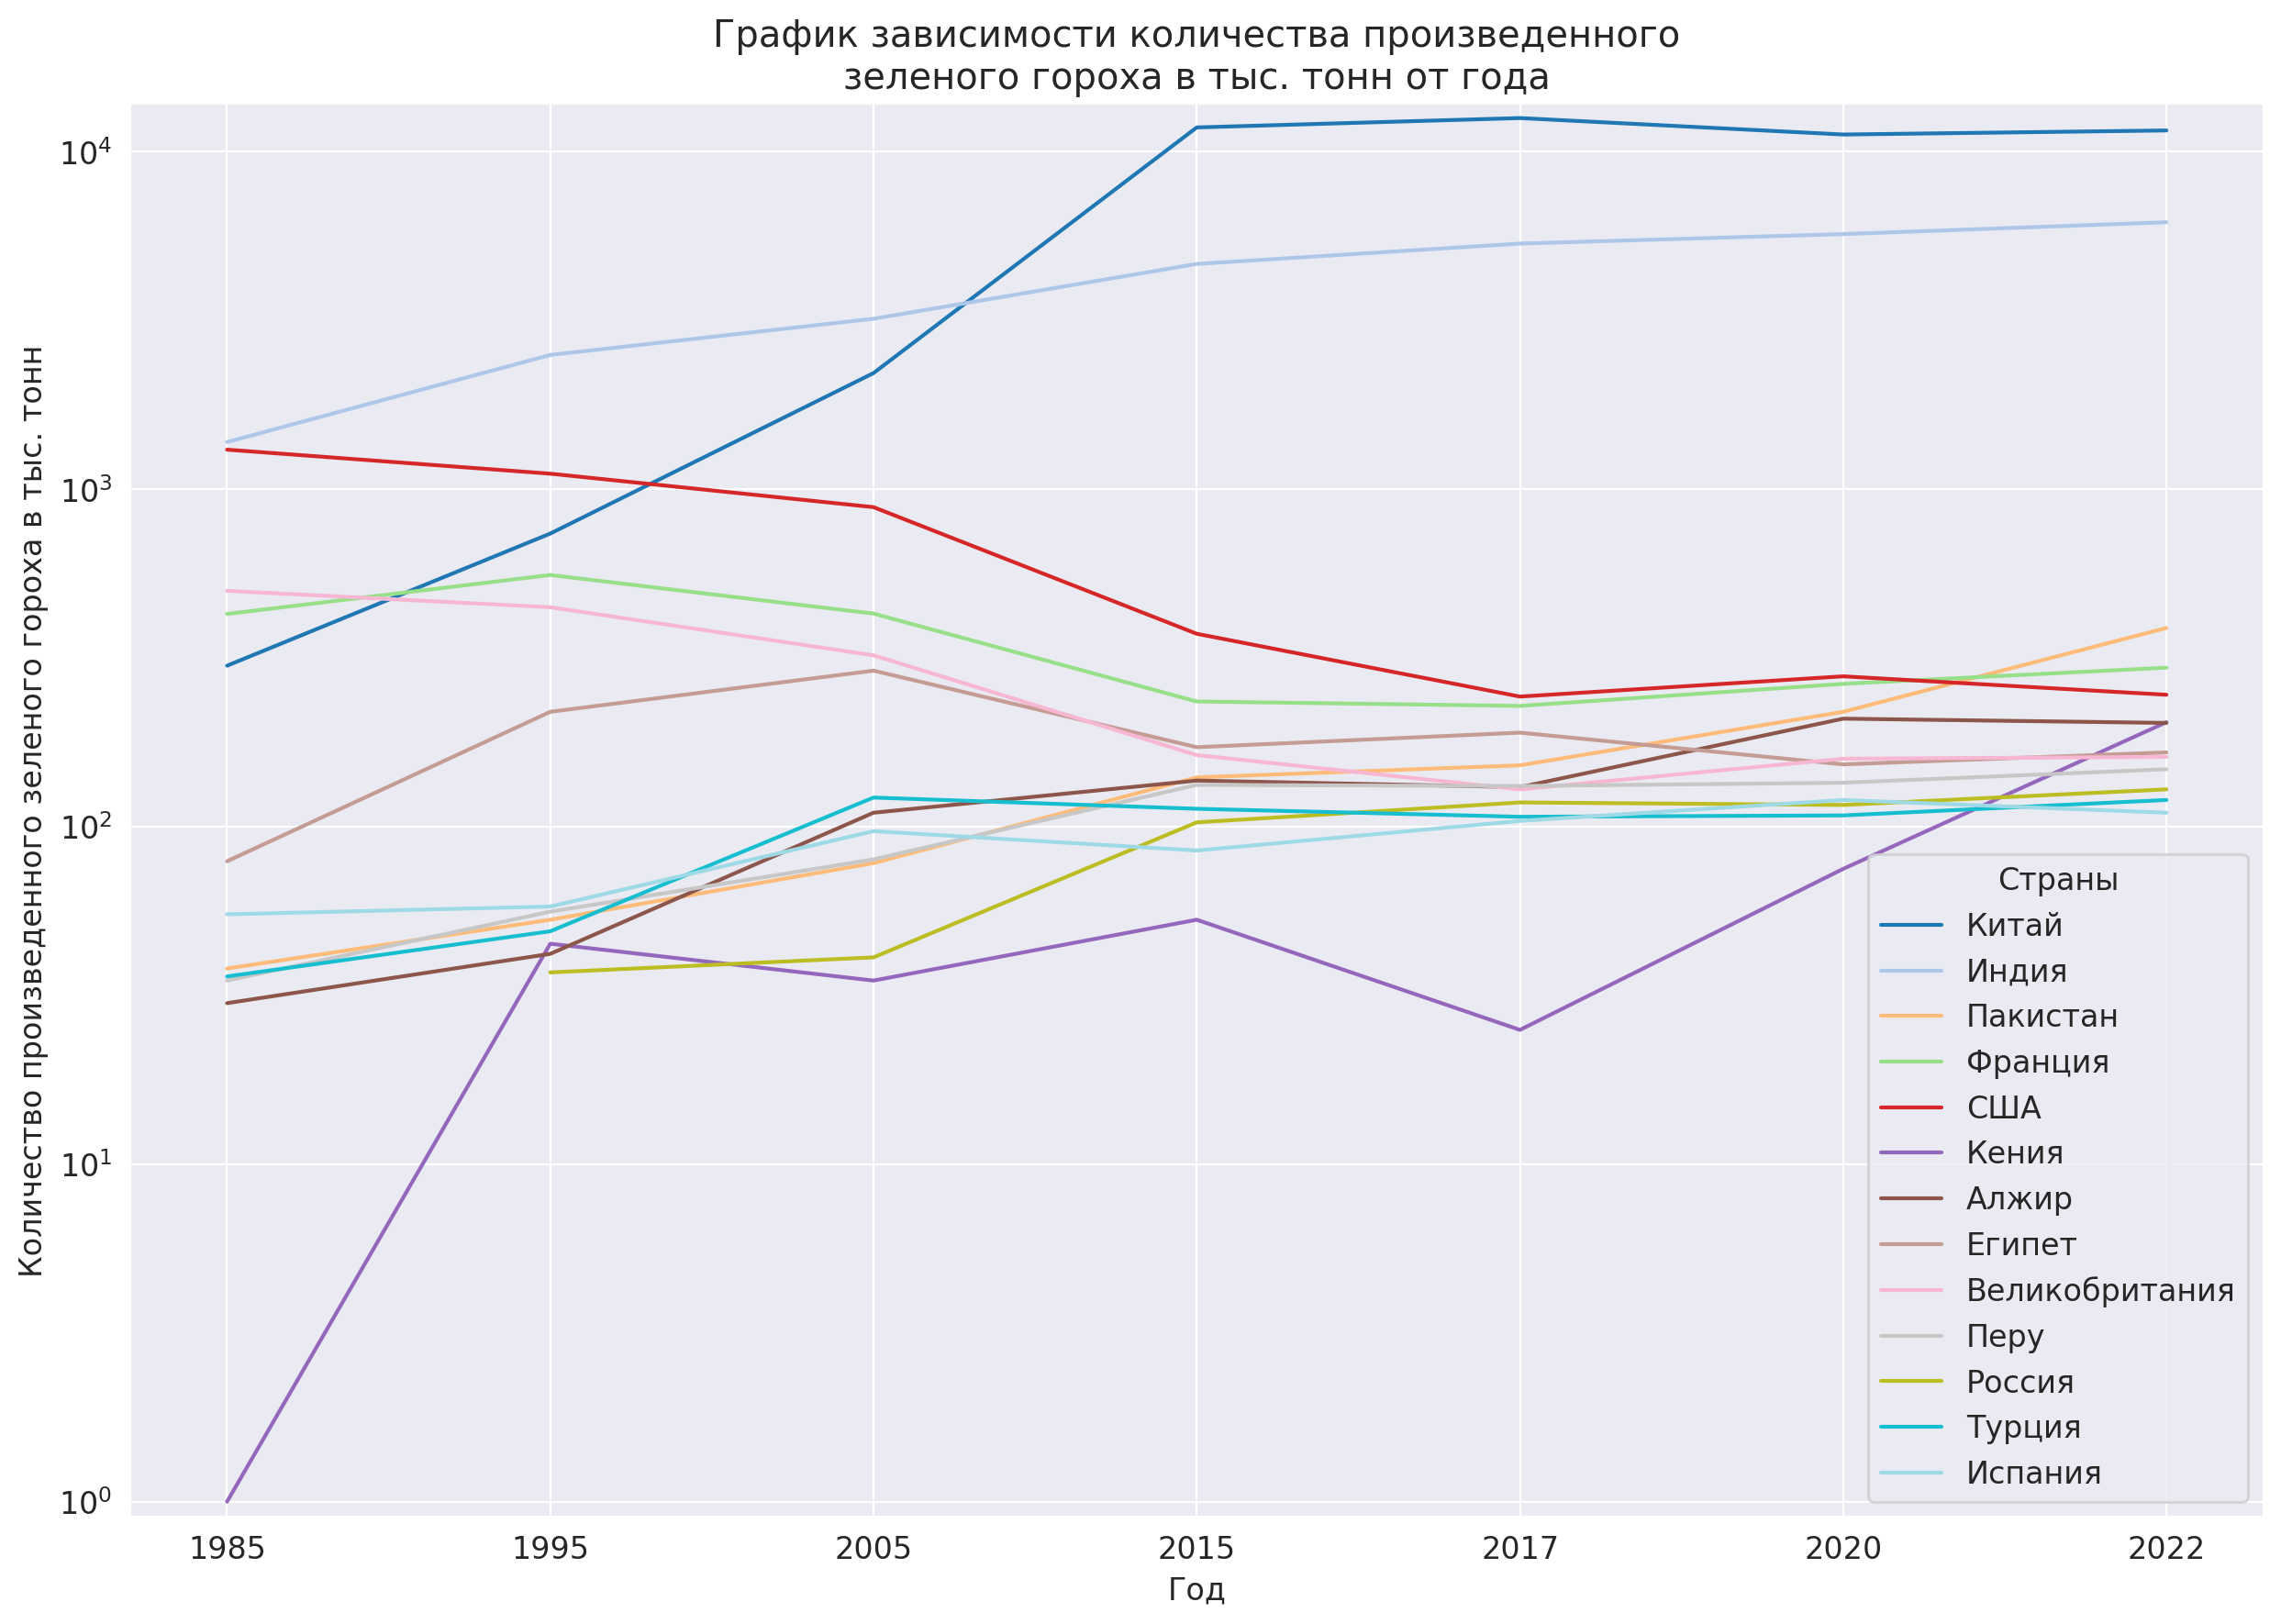

In [ ]:
colors = plt.cm.tab20(np.linspace(0, 1, len(countries)))
plt.figure(figsize=(15, 10))
all_y_val = []
for i, country in enumerate(countries):
  if country != 'Россия': # исключение для России, так как ее в 1985 году не существовало
    ser_country_data = df.loc[df['Страна'] == country, '1985':'2022'].values.flatten()
    x = years
    y = ser_country_data

  else:
    ser_country_data = df.loc[df['Страна'] == country, '1995':'2022'].values.flatten()
    x = years[1:]
    y = ser_country_data
  y = np.where(y == 0, 1, y) #чтобы Кения с 0 в 1985 году не ломалась на логарифмической шкале
  plt.plot(x, y, label=country, color=colors[i])
  all_y_val.extend(y)
plt.yscale('log') #делаю логарифмическую шкалу, потому что иначе не видно изменений стран, у которых небольшое производство гороха по сравнению с мировыми лидерами
plt.ylim(bottom=0.9 * np.min(all_y_val), top=1.1 * np.max(all_y_val))
plt.xlabel('Год')
plt.ylabel('Количество произведенного зеленого гороха в тыс. тонн')
plt.title('График зависимости количества произведенного\nзеленого гороха в тыс. тонн от года')
plt.legend(title='Страны')
plt.show()

Без логарифмированной шкалы на вертикальной оси

<ipython-input-169-52ccf0a3d157>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




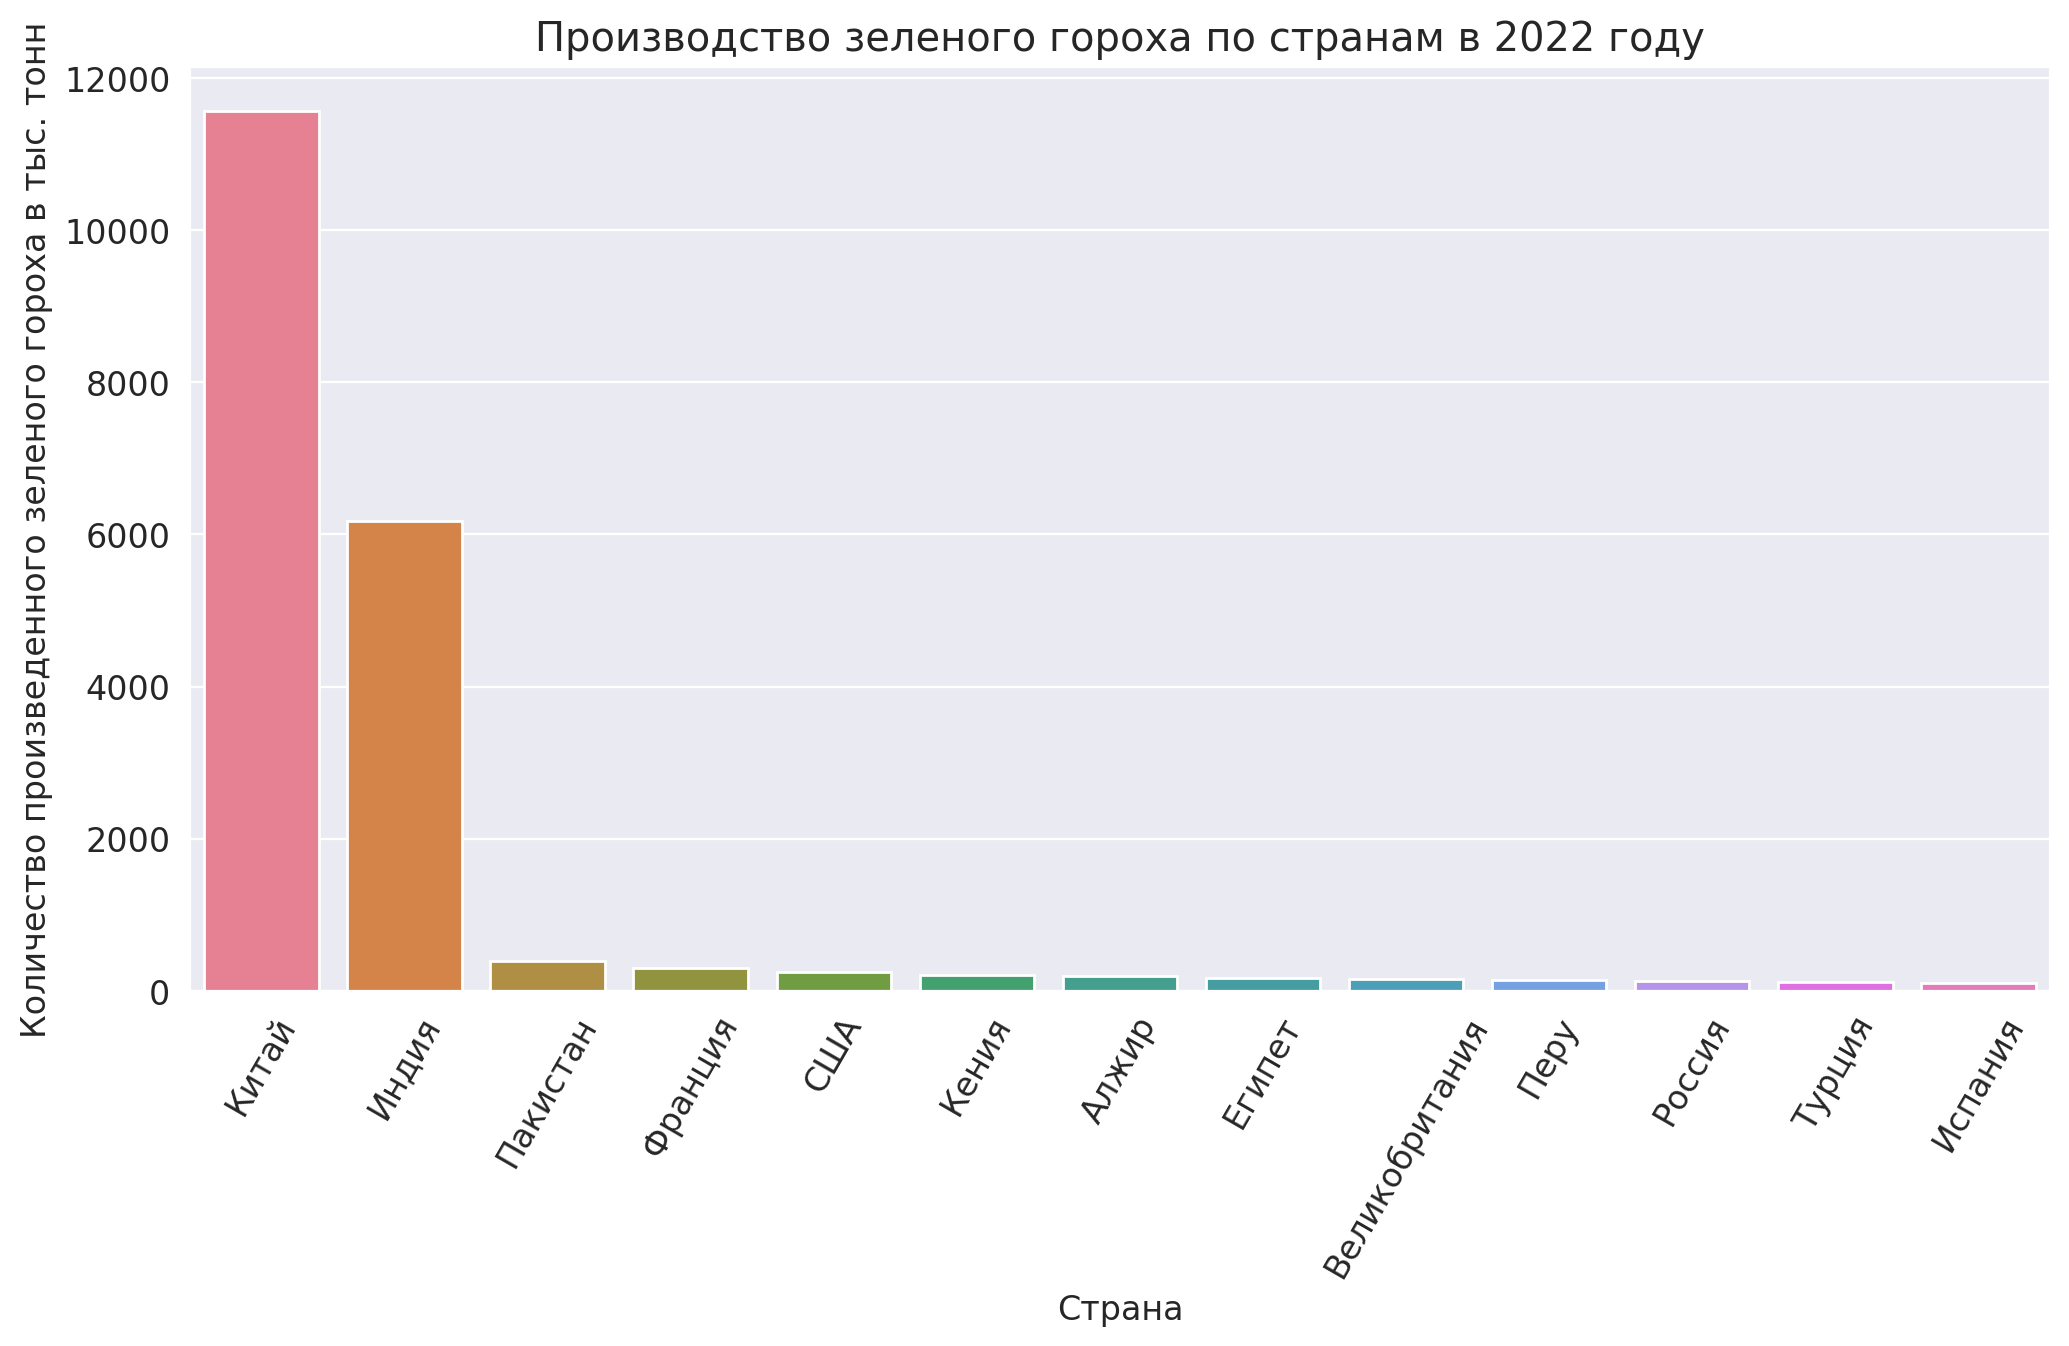

In [ ]:
special_palette = sns.color_palette("husl", 13)
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Страна', y='2022', palette=special_palette)
plt.xlabel('Страна')
plt.ylabel('Количество произведенного зеленого гороха в тыс. тонн')
plt.title('Производство зеленого гороха по странам в 2022 году')
plt.xticks(rotation=60)
plt.show()

С логарифмированной шкалой на вертикальной оси

<ipython-input-170-36403f40c801>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




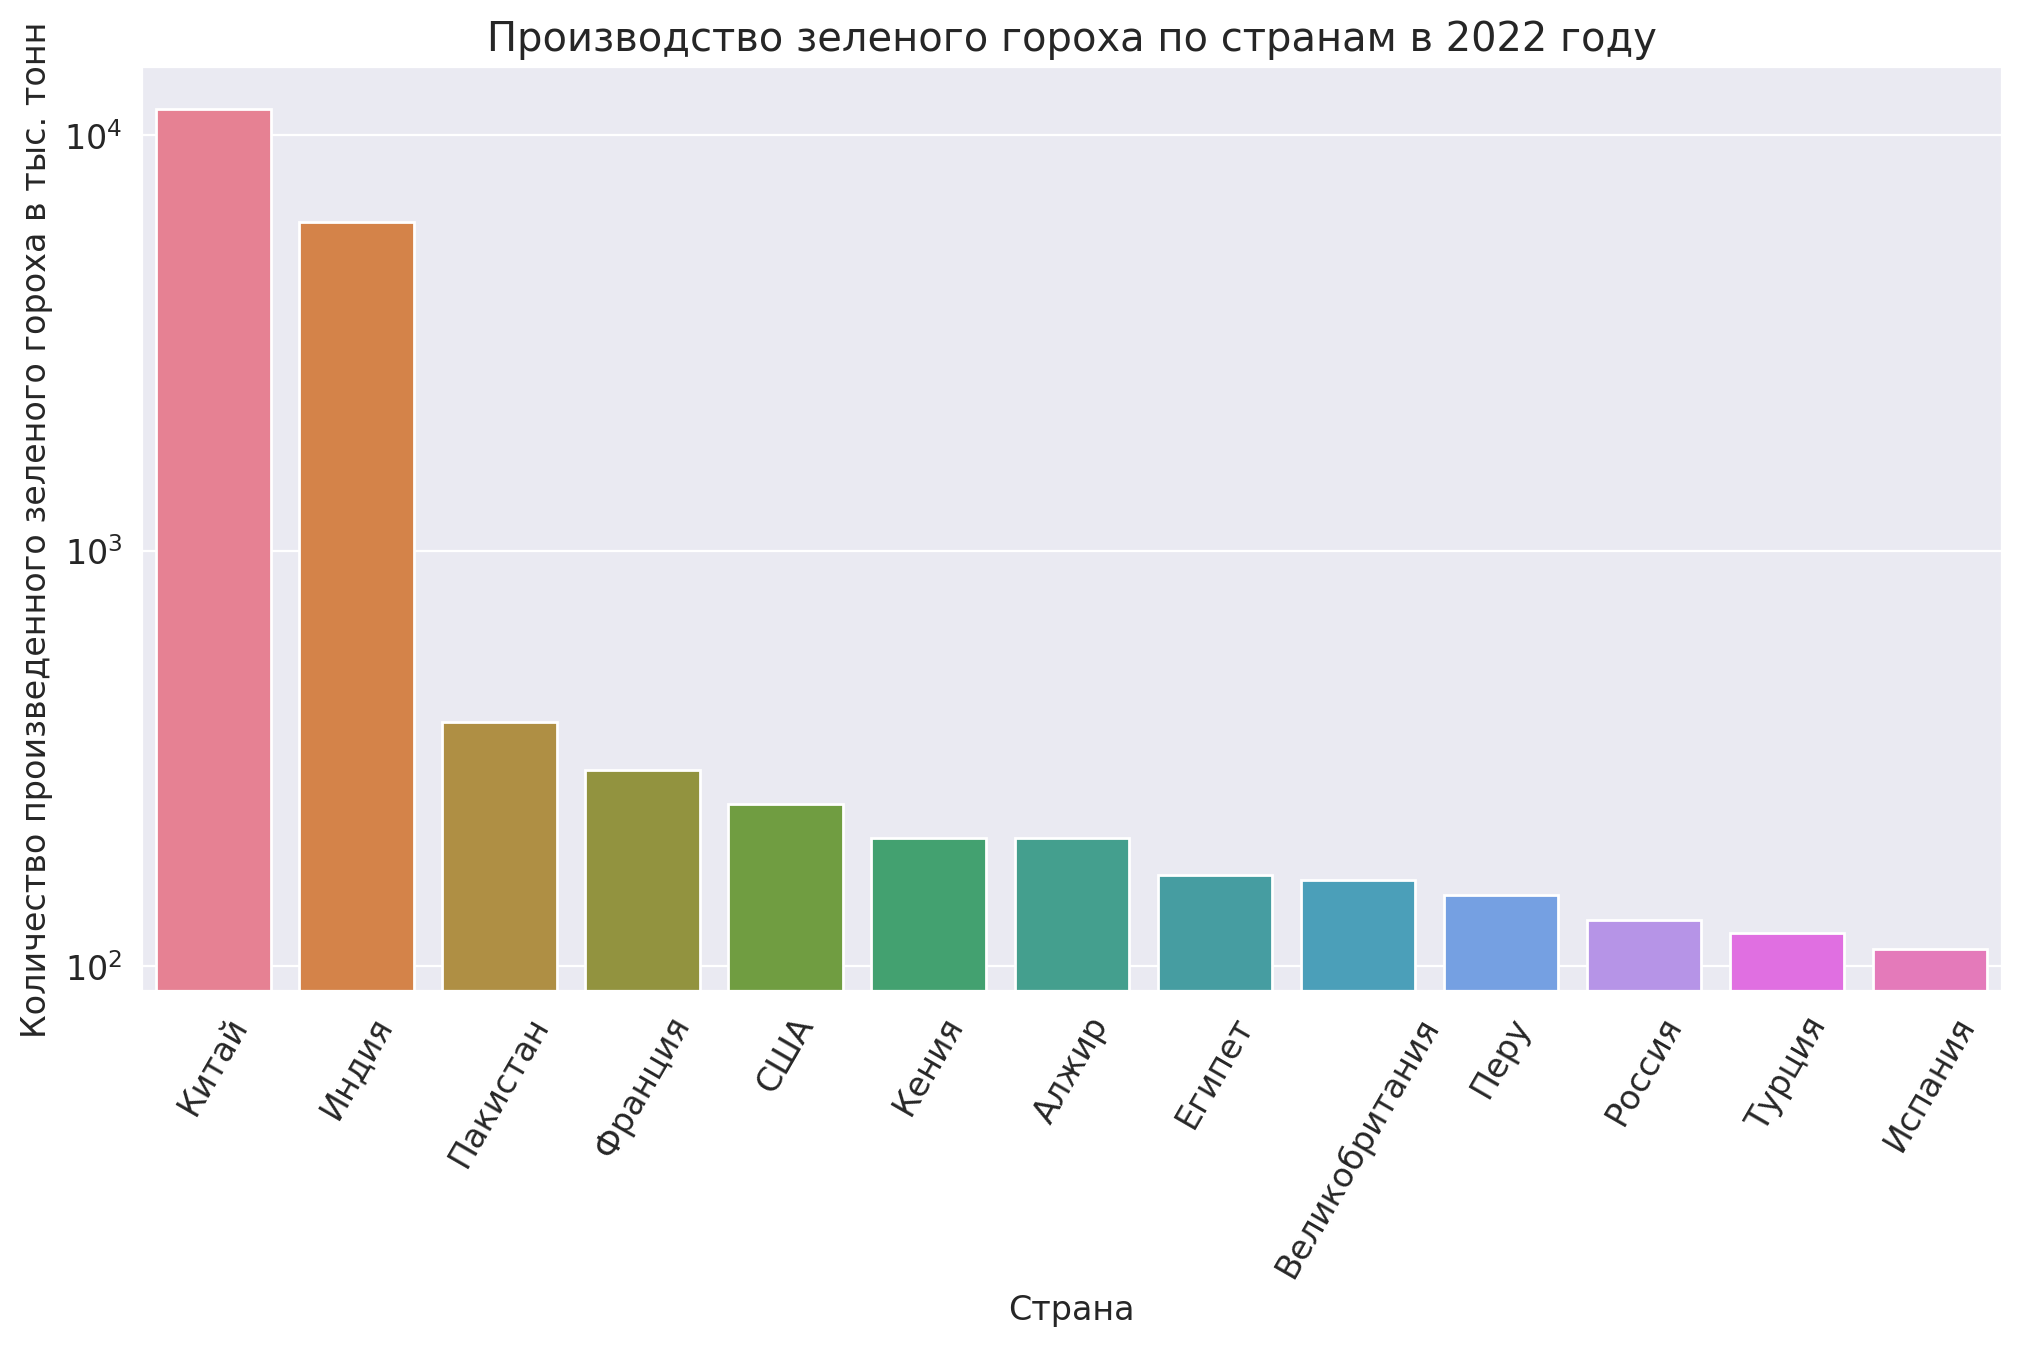

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Страна', y='2022', palette=special_palette)
plt.yscale('log')
plt.xlabel('Страна')
plt.ylabel('Количество произведенного зеленого гороха в тыс. тонн')
plt.title('Производство зеленого гороха по странам в 2022 году')
plt.xticks(rotation=60)
plt.show()

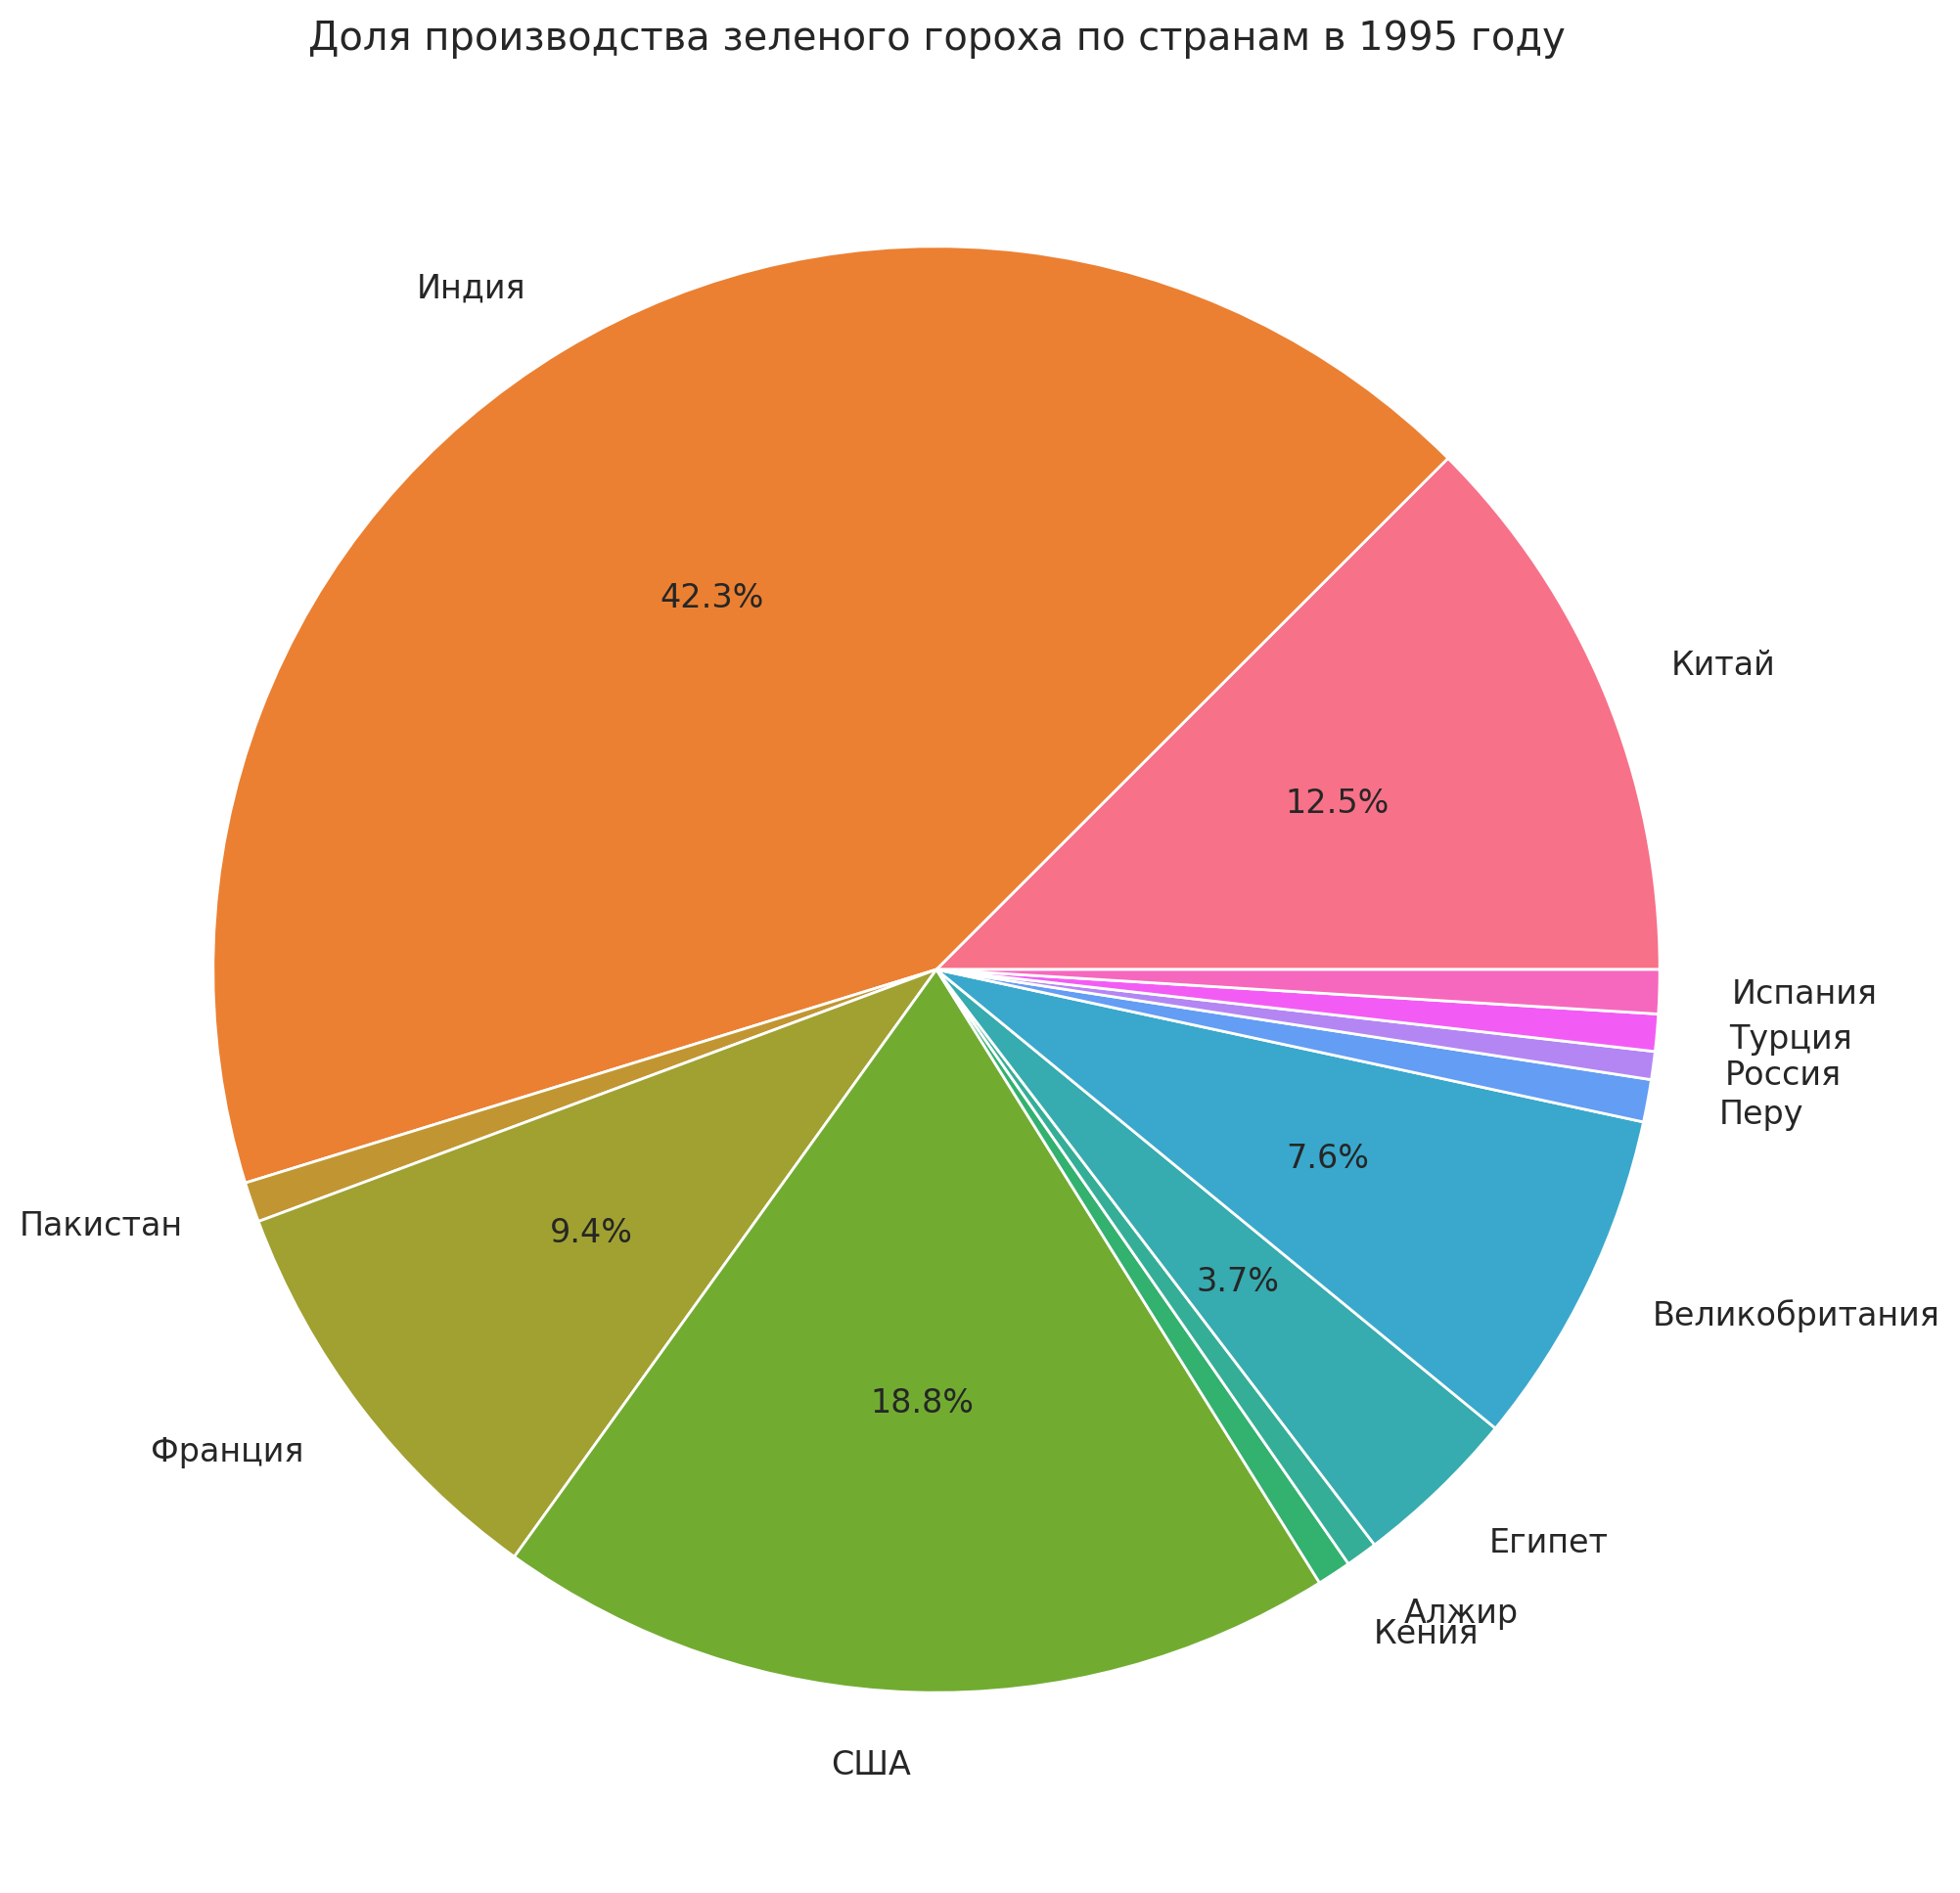

In [ ]:
def autopct_function(pct):
    return f'{pct:.1f}%' if pct > 1.5 else ''

plt.figure(figsize=(12,12))
plt.pie(df['1995'], labels=df['Страна'], autopct=autopct_function, colors=special_palette)
plt.title('Доля производства зеленого гороха по странам в 1995 году')
plt.show()

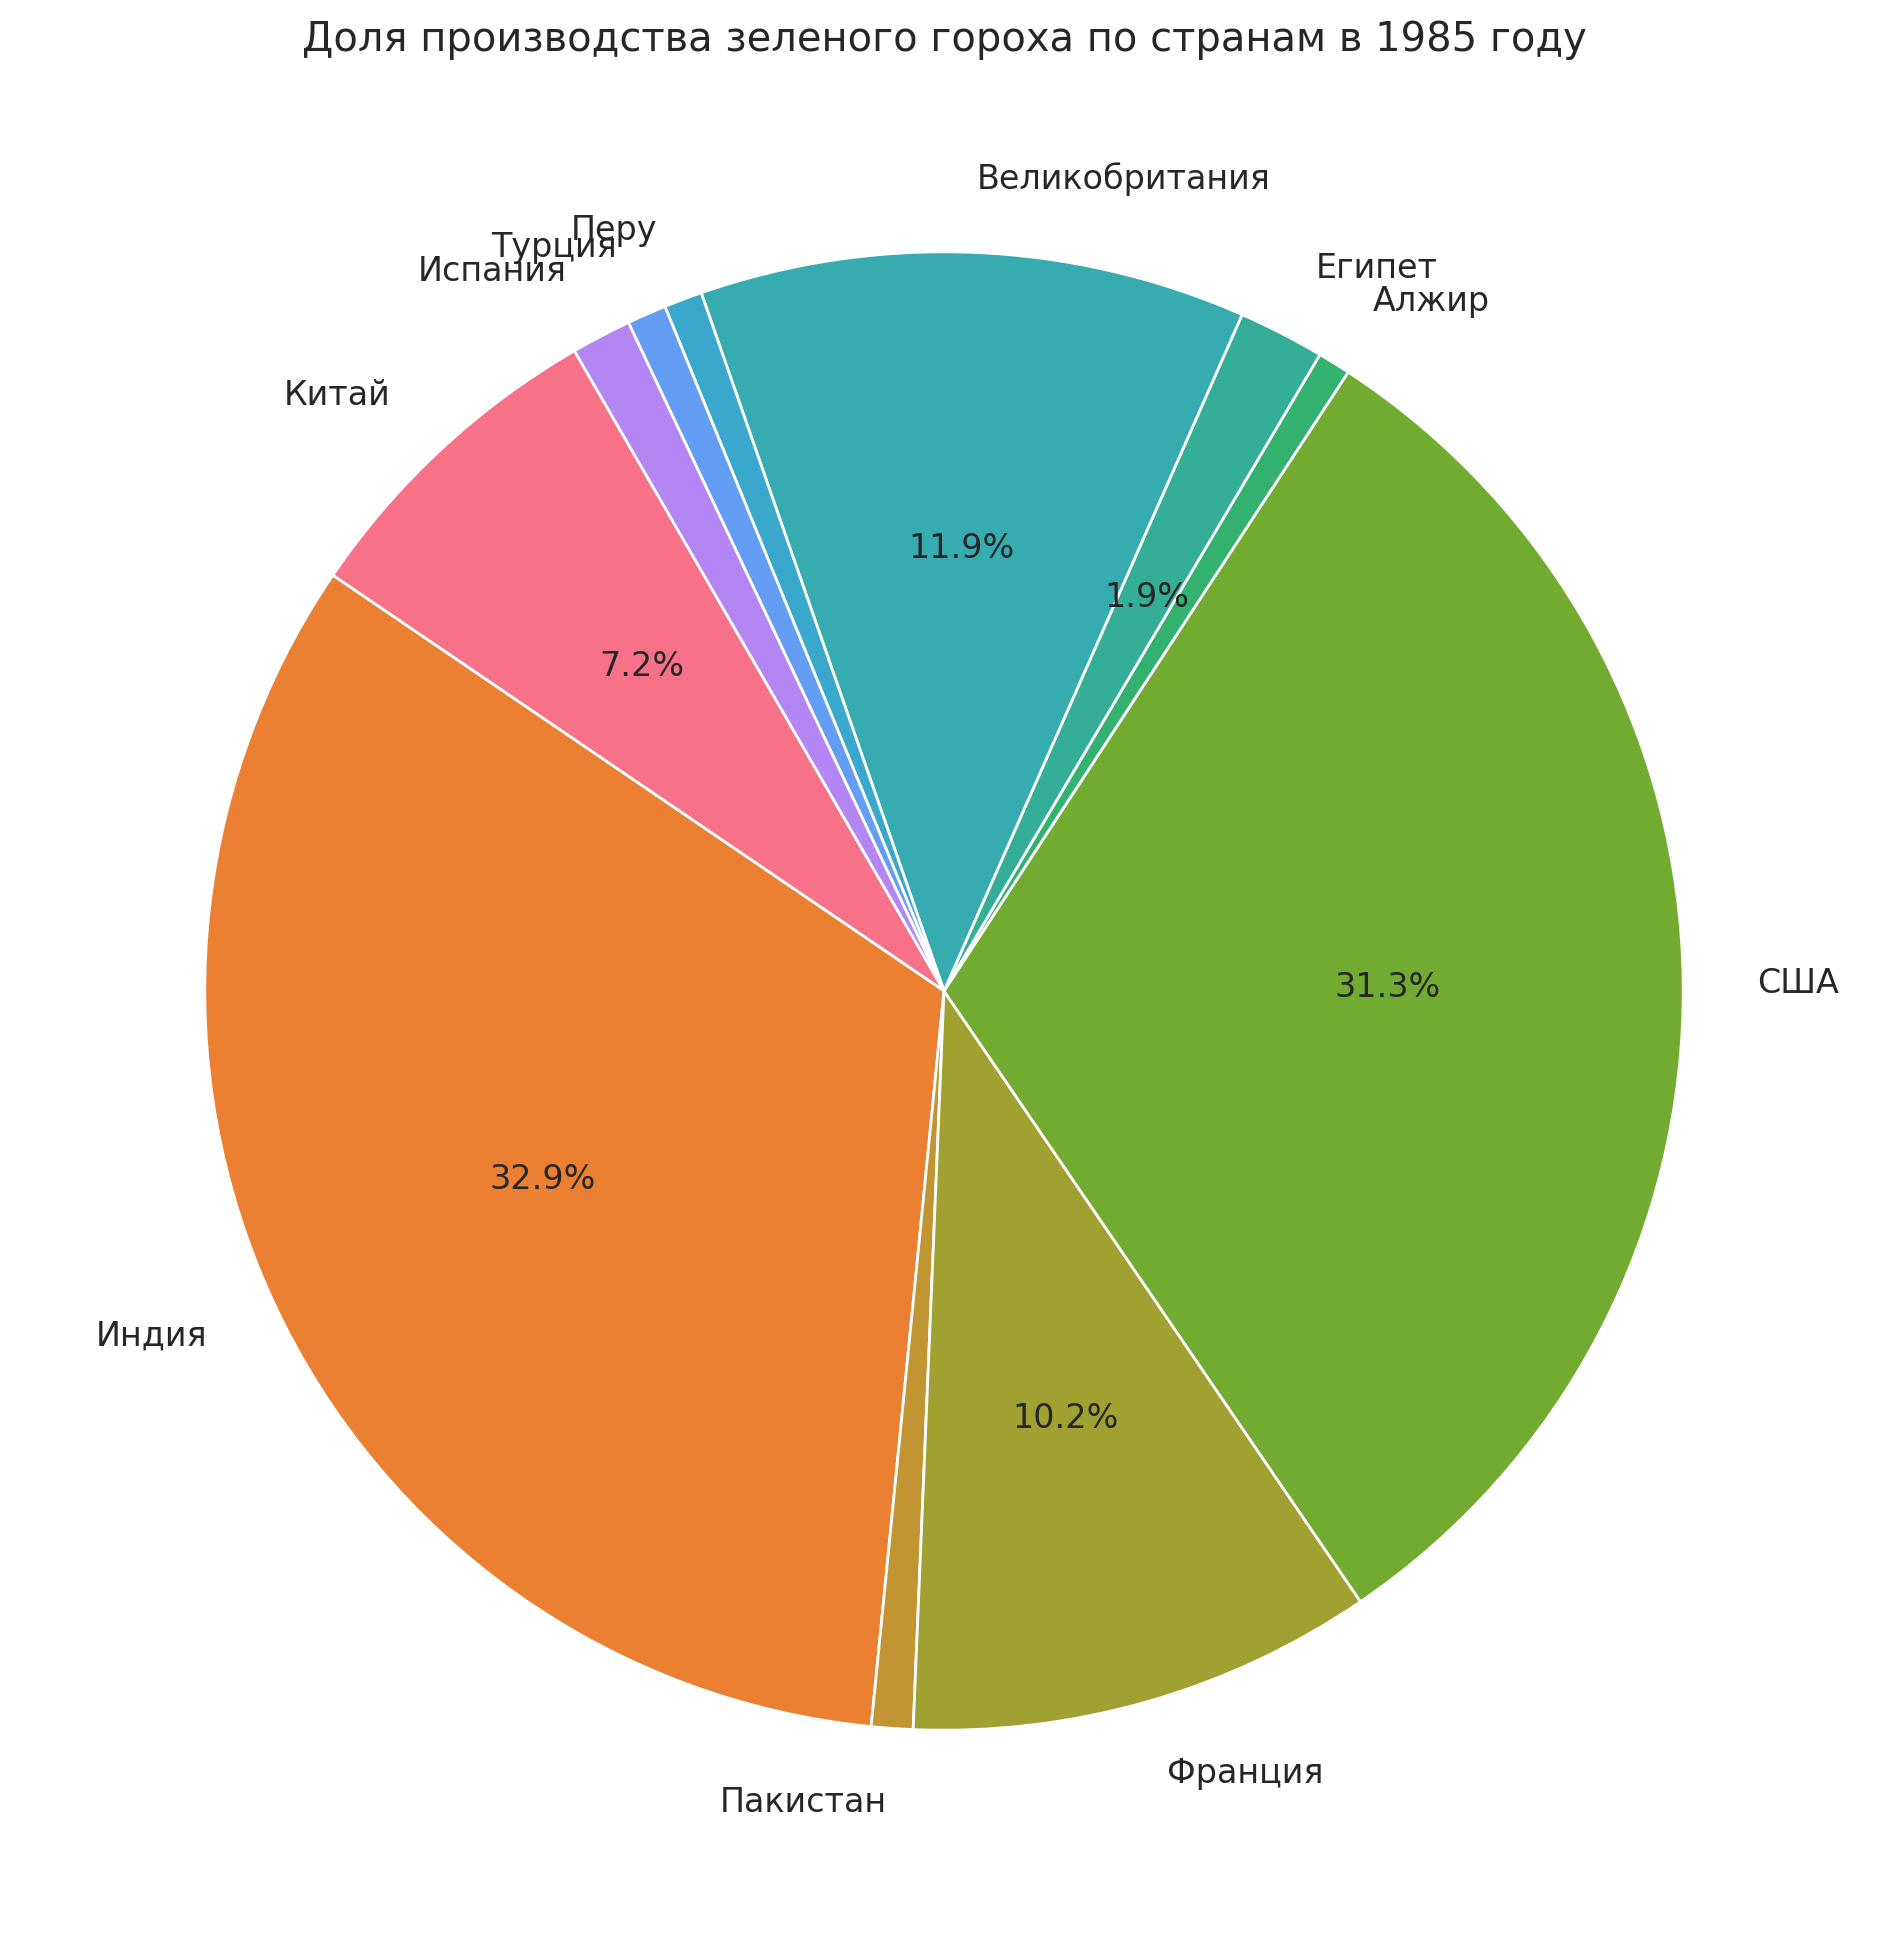

In [ ]:
#не строю Россию, так как ее не было в 1985 году и Кению, так как у нее 0 в 1985 году
plt.figure(figsize=(12,12))
plt.pie(df.loc[(df['Страна'] != 'Россия') & (df['1985'] != 0), '1985'], labels=df.loc[(df['Страна'] != 'Россия') & (df['1985'] != 0), 'Страна'], startangle=120, autopct=autopct_function, colors = special_palette)
plt.title('Доля производства зеленого гороха по странам в 1985 году')
plt.show()

<font color="violet"> Какие выводы можно сделать из этих графиков? </font>

1) По сравнению с 1985 годом в 2022 году сменился мировой лидер по производству гороха: если раньше лидером была Индия, то сейчас им является Китай, а Индия сместилась на 2 место (хотя в 1995 году Индия производила всего 42.3% гороха от всего мирового производства, а Китай в 3.5 раза меньше (12.5%) и находился лишь на 3 месте).

2) Кения, несмотря на то что в 1985 году произвела 0 тыс. тонн гороха, сумела подняться к 2022 году на 6 место и обогнать многие страны, которые в прошлом производили больше гороха, чем она.

3) Хотя США в 1985 году и занимали лидирующие позиции по производству гороха (были на 2 месте), к 2022 году успели спуститься на 5 место.

4) Россия, начав в 1995 году с последнего места, к 2022 году успела совершить небольшой, но все-таки прогресс, поднявшись на 11 место (из 13).

5) Несмотря на то что в 1985 году Пакистан был в низу рейтинга стран-производителей гороха (в антитоп-5), к 2022 году сумел вырваться в тройку лидеров (уступает лишь Китаю и Индии).

# Часть 3. Визуализируй графики на картах при помощи plotly - 3 балла.

In [ ]:
from plotly.subplots import make_subplots
import plotly.express as px

import plotly.graph_objects as go
import plotly.io as pio

Чтобы получить ISO-коды стран и закрасить их на карте мира, получу таблицу с кодами для всех стран и замерджу со своей.

In [ ]:
url = 'https://ru.wikipedia.org/wiki/ISO_3166-1'

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

tables = soup.find_all('table')
table = tables[0]
headers = [th.text.strip() for th in table.find('tr').find_all('th')]

rows = []
for tr in table.find_all('tr')[1:]:
  blocks = [td.text.strip() for td in tr.find_all('td')]
  rows.append(blocks)

df_iso = pd.DataFrame(rows, columns=headers)
df_iso = df_iso[['Страна', 'Alpha-3ISO 3166-1']]
df_iso = df_iso.rename(columns={'Alpha-3ISO 3166-1': 'ISO_code'})

In [ ]:
df_iso.loc[df_iso['Страна'] == 'Китай (Китайская Народная Республика)', 'Страна'] = 'Китай'

In [ ]:
df = df.merge(df_iso, on='Страна', how='left')

In [ ]:
df_copy = df.copy()
df_copy['1985'] = df_copy['1985'].astype(str)
df_copy.replace('<NA>', 'no data', inplace=True)

In [ ]:
fig = px.choropleth(df_copy,
                    locations='ISO_code',
                    locationmode='ISO-3',
                    color='2022',
                    hover_name='Страна',
                    hover_data=years,
                    projection='natural earth',
                    color_continuous_scale='Turbo')

fig.update_layout(title=dict(
        text='Производство зеленого гороха по странам в 2022 году в тыс. тонн',
        font=dict(size=20),
        x=0.5
    ))

fig.show()

Сделаю ниже график по логарифмуу по основанию 10 от количества, так как он лучше покажет различия между странами, которые не являются гигантами в производстве гороха.

In [ ]:
df_copy['2022_log10'] = np.log10(df_copy['2022'])

fig = px.choropleth(df_copy,
                    locations='ISO_code',
                    locationmode='ISO-3',
                    color='2022_log10',
                    hover_name='Страна',
                    hover_data=years,
                    projection='natural earth',
                    color_continuous_scale='Turbo')
fig.update_layout(title=dict(
        text='Производство зеленого гороха по странам в 2022 году в логарифме по основанию 10 от числа тыс. тонн',
        font=dict(size=20),
        x=0.5
    ))

fig.show()

<font color="violet"> Какие выводы можно сделать из этих графиков? </font>

1) Видно, что в 2022 году основные лидеры по производству зеленого гороха (топ-3) находятся в Азии (Китай, Индия, Пакистан) - большая часть мирового производства зеленого гороха сосредоточена в этой части света.

2) Также по графику можно заметить, что явным лидером по производству зеленого гороха в 2022 году в Европе является Франция. Скорее всего, это связано с тем, что всемирно известная компания по производству овощей Bonduelle (среди которых немалую долю занимает зеленый горошек) была основана и базируется во Франции.

3) Что касается Нового света (Северной и Южной Америки), то тут в производстве зеленого гороха на 2022 год лидирует США.

# Часть 4. Получи данные о текущей погоде в этих географических точках при помощи Яндекс API - 4 балла.

<font color='red'> Не забудь удалить API ключ доступа перед отправкой на проверку. Ежедневно 20 морских котиков умирают из-за того, что нерадивые программисты забывают удалить приватный API ключ доступа и заливают код в публичный репозиторий. После этого китайские хакеры получают все доступы после того, как воспользовавшись кодом из части 4 этой лабораторной, скрапят эти ключи из публичных репозиториев. Если ты не удалишь ключ - мы снимем очень много баллов. </font>

In [ ]:
# TODO

access_key = #your_api_key

headers = {
    'X-Yandex-Weather-Key': access_key
}

params = ['temperature',
      'cloudiness',
      'humidity',
      'precType',
      'precProbability',
      'precStrength',
      'pressure',
      'fahrenheit',
      'visibility',
      'windSpeed',
      'windDirection',
      'windGust']

for i, capital in enumerate(df['Столица'].to_list()):
  latitude = df.loc[df['Столица'] == capital, 'Широта'].values[0]
  longitude = df.loc[df['Столица'] == capital, 'Долгота'].values[0]
  query = f"""{{
    weatherByPoint(request: {{lat: {latitude}, lon: {longitude}}}) {{
      now {{
        temperature
        cloudiness
        humidity
        precType
        precProbability
        precStrength
        pressure
        fahrenheit: temperature(unit: FAHRENHEIT)
        visibility
        windSpeed
        windDirection
        windGust
      }}
    }}
  }}"""

  response = requests.post('https://api.weather.yandex.ru/graphql/query', headers=headers, json={'query': query})
  data = response.json()
  weather = data['data']['weatherByPoint']['now']
  for param in params:
    df.loc[df['Столица'] == capital, param] = weather[param]

In [ ]:
df

,Страна,1985,1995,2005,2015,2017,2020,2022,Столица,Широта,...,humidity,precType,precProbability,precStrength,pressure,fahrenheit,visibility,windSpeed,windDirection,windGust
0,Китай,300,739,2209,11807,12587,11250,11566,Пекин,39.904,...,78.0,NO_TYPE,0.0,ZERO,764.0,37.0,10000.0,0.8,NORTH_EAST,1.8
1,Индия,1380,2500,3200,4652,5345,5703,6182,Нью-Дели,28.617,...,64.0,NO_TYPE,0.0,ZERO,739.0,66.0,10000.0,0.9,NORTH_EAST,1.2
2,Пакистан,38,53,78,140,152,219,388,Исламабад,33.667,...,64.0,NO_TYPE,0.0,ZERO,718.0,55.0,10000.0,2.7,NORTH_EAST,3.9
3,Франция,427,557,428,235,228,265,296,Париж,48.833,...,51.0,NO_TYPE,0.0,ZERO,747.0,55.0,10000.0,4.1,EAST,9.5
4,США,1310,1112,885,373,243,279,246,Вашингтон,38.895,...,27.0,NO_TYPE,0.0,ZERO,755.0,51.0,10000.0,9.8,NORTH_WEST,12.6
5,Кения,0,45,35,53,25,75,204,Найроби,-1.283,...,47.0,NO_TYPE,0.0,ZERO,626.0,73.0,10000.0,5.1,EAST,7.6
6,Алжир,30,42,110,137,131,209,203,Алжир,36.776,...,41.0,NO_TYPE,0.0,ZERO,742.0,69.0,10000.0,5.0,SOUTH,13.8
7,Египет,79,219,290,172,190,153,166,Каир,30.056,...,64.0,NO_TYPE,0.0,ZERO,759.0,62.0,10000.0,2.6,NORTH,4.9
8,Великобритания,500,447,322,163,129,159,161,Лондон,51.507,...,66.0,NO_TYPE,0.0,ZERO,752.0,53.0,10000.0,3.0,NORTH_EAST,5.8
9,Перу,35,56,80,133,132,135,148,Лима,-12.035,...,64.0,NO_TYPE,0.0,ZERO,738.0,80.0,10000.0,4.6,SOUTH_WEST,9.1


# Часть 5. Визуализируй данные о погоде на картах при помощи plotly - 3 балла.

In [ ]:
# TODO
fig = px.scatter_geo(df, lat='Широта', lon='Долгота',
                     hover_name='Столица',
                     hover_data=params,
                     color='temperature',
                     projection='natural earth')

fig.update_layout(title=dict(
        text='Данные о погоде в столицах стран-лидеров по производству зеленого гороха в 2022 году в мире',
        font=dict(size=20),
        x=0.5
    ))

fig.show()